In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [3]:
import yake
import pandas as pd
import re
import nltk

# nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

# nltk.download('wordnet')
from sklearn.feature_extraction.text import TfidfTransformer
from os import path, getcwd
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns

<IPython.core.display.Javascript object>

In [4]:
# paths
main_folder = getcwd()
data_folder = main_folder + "\\data"

<IPython.core.display.Javascript object>

### if to use full text

In [5]:
papers = pd.read_csv(data_folder + "\\papers.csv")

<IPython.core.display.Javascript object>

In [6]:
papers.head(3)

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...


<IPython.core.display.Javascript object>

In [7]:
papers2 = papers[papers["abstract"] != "Abstract Missing"]

<IPython.core.display.Javascript object>

In [8]:
papers2.head(3)

,id,year,title,event_type,pdf_name,abstract,paper_text
941,1861,2000,Algorithms for Non-negative Matrix Factorization,NaN,1861-algorithms-for-non-negative-matrix-factor...,Non-negative matrix factorization (NMF) has pr...,Algorithms for Non-negative Matrix\nFactorizat...
1067,1975,2001,Characterizing Neural Gain Control using Spike...,NaN,1975-characterizing-neural-gain-control-using-...,Spike-triggered averaging techniques are effec...,Characterizing neural gain control using\nspik...
2384,3163,2007,Competition Adds Complexity,NaN,3163-competition-adds-complexity.pdf,It is known that determinining whether a DEC-P...,Competition adds complexity\n\nJudy Goldsmith\...


<IPython.core.display.Javascript object>

In [9]:
papers2["abstract1"] = papers2["title"] + papers2["abstract"]

C:\Users\daniel.andrade\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>

In [10]:
papers2.to_csv(data_folder + "\\papers2.txt", sep="\t", mode="a")

<IPython.core.display.Javascript object>

### if to use only the abstracts

In [11]:
# load the dataset
dataset = pd.read_csv(data_folder + "\\papers2.txt", delimiter="\t", index_col=[0])
dataset.head()

,id,year,title,event_type,pdf_name,abstract,paper_text,abstract1
941.0,1861,2000,Algorithms for Non-negative Matrix Factorization,NaN,1861-algorithms-for-non-negative-matrix-factor...,Non-negative matrix factorization (NMF) has pr...,Algorithms for Non-negative Matrix\r\nFactoriz...,Algorithms for Non-negative Matrix Factorizati...
1067.0,1975,2001,Characterizing Neural Gain Control using Spike...,NaN,1975-characterizing-neural-gain-control-using-...,Spike-triggered averaging techniques are effec...,Characterizing neural gain control using\r\nsp...,Characterizing Neural Gain Control using Spike...
2384.0,3163,2007,Competition Adds Complexity,NaN,3163-competition-adds-complexity.pdf,It is known that determinining whether a DEC-P...,Competition adds complexity\r\n\r\nJudy Goldsm...,Competition Adds ComplexityIt is known that de...
2385.0,3164,2007,Efficient Principled Learning of Thin Junction...,NaN,3164-efficient-principled-learning-of-thin-jun...,We present the first truly polynomial algorith...,Efficient Principled Learning of Thin Junction...,Efficient Principled Learning of Thin Junction...
2388.0,3167,2007,Regularized Boost for Semi-Supervised Learning,NaN,3167-regularized-boost-for-semi-supervised-lea...,Semi-supervised inductive learning concerns ho...,Regularized Boost for Semi-Supervised Learning...,Regularized Boost for Semi-Supervised Learning...


<IPython.core.display.Javascript object>

In [12]:
dataset.shape

(7849, 8)

<IPython.core.display.Javascript object>

In [13]:
# Fetch wordcount for each abstract
dataset["word_count"] = dataset["abstract1"].apply(lambda x: len(str(x).split(" ")))
dataset[["abstract1", "word_count"]].head()

,abstract1,word_count
941.0,Algorithms for Non-negative Matrix Factorizati...,111
1067.0,Characterizing Neural Gain Control using Spike...,87
2384.0,Competition Adds ComplexityIt is known that de...,69
2385.0,Efficient Principled Learning of Thin Junction...,149
2388.0,Regularized Boost for Semi-Supervised Learning...,123


<IPython.core.display.Javascript object>

In [14]:
# Descriptive statistics of word counts
dataset.word_count.describe()

count    7849.000000
mean      154.868518
std        46.027950
min         1.000000
25%       121.000000
50%       150.000000
75%       184.000000
max       324.000000
Name: word_count, dtype: float64

<IPython.core.display.Javascript object>

In [15]:
# Identify common words
freq = pd.Series(" ".join(dataset["abstract1"]).split()).value_counts()[:20]
freq

the         60214
of          43370
a           33036
and         28436
to          26208
in          18908
for         16764
that        15682
is          15374
on          11408
we          10334
with        10284
We          10006
as           7372
this         7354
are          7092
an           6796
by           6604
can          5916
learning     5780
dtype: int64

<IPython.core.display.Javascript object>

In [16]:
# Identify uncommon words
freq1 = pd.Series(" ".join(dataset["abstract1"]).split()).value_counts()[-20:]
freq1

ChainsAs             2
LDC                  2
theory."             2
DomainMany           2
HRTFs.               2
translation).        2
accuracy-cost        2
fLDS,                2
("convolutional")    2
stack,               2
brain--regions       2
R^{n                 2
therapies.           2
dHDP                 2
Planes               2
case."               2
s(X)                 2
manageable,          2
(Hedge,              2
abstract1            1
dtype: int64

<IPython.core.display.Javascript object>

### stemming and lemmatization 

In [17]:
lem = WordNetLemmatizer()
stem = PorterStemmer()
word = "inversely"
print("stemming:", stem.stem(word))
print("lemmatization:", lem.lemmatize(word, "v"))

stemming: invers
lemmatization: inversely


<IPython.core.display.Javascript object>

In [18]:
# Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))
# Creating a list of custom stopwords
new_words = [
    "using",
    "show",
    "result",
    "large",
    "also",
    "iv",
    "one",
    "two",
    "new",
    "previously",
    "shown",
]
stop_words = stop_words.union(new_words)

<IPython.core.display.Javascript object>

In [19]:
corpus = []
for i in dataset["abstract1"]:
    # Remove punctuations
    text = re.sub("[^a-zA-Z]", " ", i)
    # text = re.sub(r'[^\w\s]', ' ', dataset['abstract1'][i])

    # Convert to lowercase
    text = text.lower()

    # remove tags
    text = re.sub("&lt;/?.*?&gt;", " &lt;&gt; ", text)

    # remove special characters and digits
    text = re.sub("(\\d|\\W)+", " ", text)

    ##Convert to list from string
    text = text.split()

    ##Stemming
    ps = PorterStemmer()
    # Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in stop_words]
    text = " ".join(text)
    corpus.append(text)

<IPython.core.display.Javascript object>

In [20]:
len(corpus)

7849

<IPython.core.display.Javascript object>

In [21]:
# View corpus item
corpus[222]

'temporal difference based actor critic learning convergence neural implementationactor critic algorithm reinforcement learning achieving renewed popularity due good convergence property situation approach often fail e g function approximation involved interestingly growing evidence actor critic approach based phasic dopamine signal play key role biological learning cortical basal ganglion derive temporal difference based actor critic learning algorithm convergence proved without assuming separate time scale actor critic approach demonstrated applying network spiking neuron established relation phasic dopamine temporal difference signal lends support biological relevance algorithm'

<IPython.core.display.Javascript object>

## Data exploration

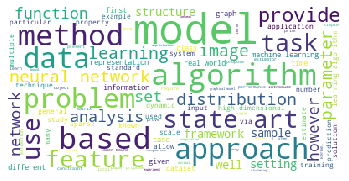

<IPython.core.display.Javascript object>

In [22]:
# Word cloud
%matplotlib inline
wordcloud = WordCloud(
    background_color="white",
    stopwords=stop_words,
    max_words=100,
    max_font_size=50,
    random_state=42,
).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## text processing

In [23]:
cv = CountVectorizer(
    max_df=0.8, stop_words=stop_words, max_features=10000, ngram_range=(1, 3)
)
X = cv.fit_transform(corpus)

<IPython.core.display.Javascript object>

In [24]:
list(cv.vocabulary_.keys())[:10]

['algorithm',
 'non',
 'negative',
 'matrix',
 'factorization',
 'nmf',
 'useful',
 'decomposition',
 'multivariate',
 'data']

<IPython.core.display.Javascript object>

[Text(0, 0, 'model'),
 Text(0, 0, 'algorithm'),
 Text(0, 0, 'learning'),
 Text(0, 0, 'method'),
 Text(0, 0, 'problem'),
 Text(0, 0, 'data'),
 Text(0, 0, 'approach'),
 Text(0, 0, 'function'),
 Text(0, 0, 'network'),
 Text(0, 0, 'based'),
 Text(0, 0, 'time'),
 Text(0, 0, 'paper'),
 Text(0, 0, 'task'),
 Text(0, 0, 'result'),
 Text(0, 0, 'distribution'),
 Text(0, 0, 'propose'),
 Text(0, 0, 'feature'),
 Text(0, 0, 'state'),
 Text(0, 0, 'image'),
 Text(0, 0, 'bound')]

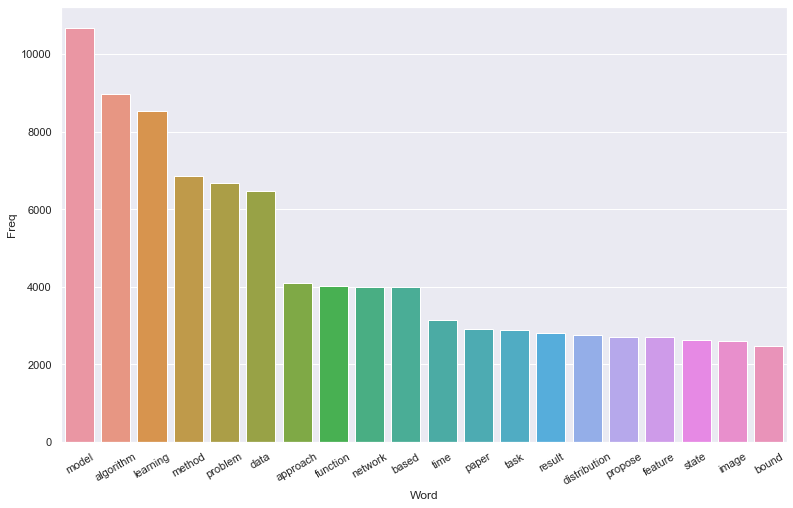

<IPython.core.display.Javascript object>

In [25]:
# Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]


# Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns = ["Word", "Freq"]

# Barplot of most freq words
sns.set(rc={"figure.figsize": (13, 8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

                   Bi-gram  Freq
0                state art  1430
1           neural network  1226
2         machine learning   830
3               real world   760
4         high dimensional   738
5       learning algorithm   706
6              lower bound   542
7          graphical model   496
8                 data set   478
9            paper propose   474
10  reinforcement learning   470
11        gaussian process   468
12                low rank   468
13    optimization problem   450
14     experimental result   440
15           loss function   422
16        gradient descent   402
17             monte carlo   386
18     stochastic gradient   384
19        convergence rate   376


[Text(0, 0, 'state art'),
 Text(0, 0, 'neural network'),
 Text(0, 0, 'machine learning'),
 Text(0, 0, 'real world'),
 Text(0, 0, 'high dimensional'),
 Text(0, 0, 'learning algorithm'),
 Text(0, 0, 'lower bound'),
 Text(0, 0, 'graphical model'),
 Text(0, 0, 'data set'),
 Text(0, 0, 'paper propose'),
 Text(0, 0, 'reinforcement learning'),
 Text(0, 0, 'gaussian process'),
 Text(0, 0, 'low rank'),
 Text(0, 0, 'optimization problem'),
 Text(0, 0, 'experimental result'),
 Text(0, 0, 'loss function'),
 Text(0, 0, 'gradient descent'),
 Text(0, 0, 'monte carlo'),
 Text(0, 0, 'stochastic gradient'),
 Text(0, 0, 'convergence rate')]

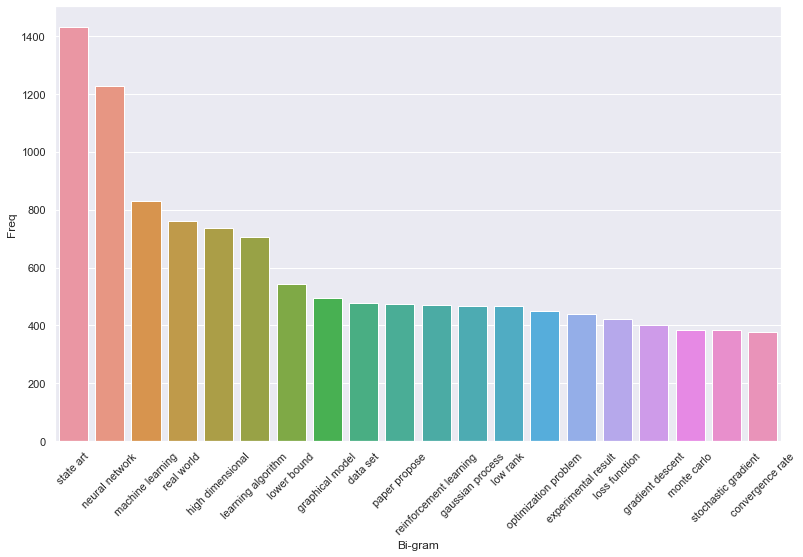

<IPython.core.display.Javascript object>

In [26]:
# Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2, 2), max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]


top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns = ["Bi-gram", "Freq"]
print(top2_df)

# Barplot of most freq Bi-grams
sns.set(rc={"figure.figsize": (13, 8)})
h = sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

                        Tri-gram  Freq
0   convolutional neural network   206
1            deep neural network   198
2    stochastic gradient descent   168
3          state art performance   164
4            real world datasets   152
5       recurrent neural network   150
6               state art method   146
7       semi supervised learning   142
8                low rank matrix   142
9             multi armed bandit   138
10               real world data   136
11       markov decision process   132
12          synthetic real world   124
13         latent variable model   124
14         outperforms state art   120
15              state art result   120
16             chain monte carlo   114
17            markov chain monte   112
18   empirical risk minimization   104
19  principal component analysis    98


[Text(0, 0, 'convolutional neural network'),
 Text(0, 0, 'deep neural network'),
 Text(0, 0, 'stochastic gradient descent'),
 Text(0, 0, 'state art performance'),
 Text(0, 0, 'real world datasets'),
 Text(0, 0, 'recurrent neural network'),
 Text(0, 0, 'state art method'),
 Text(0, 0, 'semi supervised learning'),
 Text(0, 0, 'low rank matrix'),
 Text(0, 0, 'multi armed bandit'),
 Text(0, 0, 'real world data'),
 Text(0, 0, 'markov decision process'),
 Text(0, 0, 'synthetic real world'),
 Text(0, 0, 'latent variable model'),
 Text(0, 0, 'outperforms state art'),
 Text(0, 0, 'state art result'),
 Text(0, 0, 'chain monte carlo'),
 Text(0, 0, 'markov chain monte'),
 Text(0, 0, 'empirical risk minimization'),
 Text(0, 0, 'principal component analysis')]

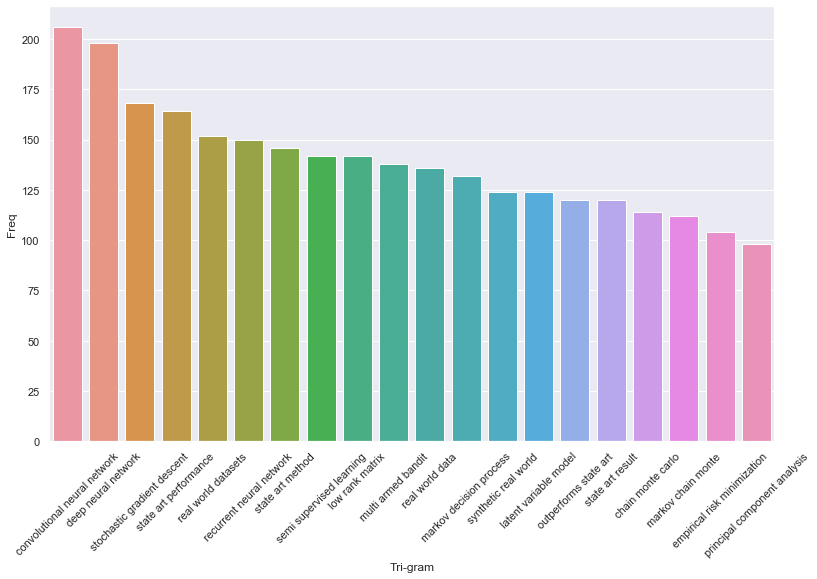

<IPython.core.display.Javascript object>

In [27]:
# Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3, 3), max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]


top3_words = get_top_n3_words(corpus, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns = ["Tri-gram", "Freq"]
print(top3_df)

# Barplot of most freq Tri-grams
sns.set(rc={"figure.figsize": (13, 8)})
j = sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)

In [28]:
tfidf_transformer = TfidfTransformer(smooth_idf=True, use_idf=True)
tfidf_transformer.fit(X)
# get feature names
feature_names = cv.get_feature_names()

<IPython.core.display.Javascript object>

### fetch one document for which keywords will be extracted

In [29]:
doc = corpus[532]

<IPython.core.display.Javascript object>

In [30]:
doc

'compositionality optimal control lawswe present theory compositionality stochastic optimal control showing task optimal controller constructed certain primitive primitive feedback controller pursuing agenda mixed proportion much progress making towards agenda compatible agenda present task resulting composite control law provably optimal problem belongs certain class class rather general yet number unique property bellman equation made linear even non linear discrete dynamic give rise compositionality developed special case linear dynamic gaussian noise framework yield analytical solution e non linear mixture linear quadratic regulator without requiring final cost quadratic generally natural set control primitive constructed applying svd green function bellman equation illustrate theory context human arm movement idea optimality compositionality prominent field motor control yet hard reconcile work make possible'

<IPython.core.display.Javascript object>

### set parameters

In [31]:
language = "en"
max_ngram_size = 1
deduplication_thresold = 0.9
deduplication_algo = "seqm"
windowSize = 1
numOfKeywords = 10

<IPython.core.display.Javascript object>

In [32]:
custom_kw_extractor = yake.KeywordExtractor(
    lan=language,
    n=max_ngram_size,
    dedupLim=deduplication_thresold,
    dedupFunc=deduplication_algo,
    windowsSize=windowSize,
    top=numOfKeywords,
    features=None,
)
keywords = custom_kw_extractor.extract_keywords(doc)

print("Keywords:", "\n")
for kw in keywords:
    print(kw)

Keywords: 

('control', 0.03723664834607728)
('linear', 0.03723664834607728)
('optimal', 0.040791098035083656)
('compositionality', 0.046554139723534504)
('primitive', 0.054404174852574386)
('agenda', 0.054404174852574386)
('bellman', 0.056518744115477276)
('equation', 0.056518744115477276)
('present', 0.06944636785225573)
('theory', 0.06944636785225573)


<IPython.core.display.Javascript object>